In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import seaborn as sns

In [36]:
# Memuat dataset
car_data = pd.read_csv("car_evaluation.csv")

# Menampilkan isi dari dataset
print("\nIsi dataset pertama 5 baris:")
print(car_data.head())

print("Deskripsi dataset:")
print(car_data.describe())
print("\nNilai yang hilang per kolom:")
print(car_data.isnull().sum())



Isi dataset pertama 5 baris:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
Deskripsi dataset:
       vhigh vhigh.1     2   2.1 small   low  unacc
count   1727    1727  1727  1727  1727  1727   1727
unique     4       4     4     3     3     3      4
top     high    high     3     4   med   med  unacc
freq     432     432   432   576   576   576   1209

Nilai yang hilang per kolom:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


In [37]:
# Menetapkan nama kolom berdasarkan struktur dataset UCI
car_data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Mengonversi kolom kategorikal ke nilai numerik
label_encoders = {}
for column in car_data.columns:
    le = LabelEncoder()
    car_data[column] = le.fit_transform(car_data[column])
    label_encoders[column] = le

# Memisahkan fitur (X) dan target (y)
X = car_data.drop("class", axis=1)
y = car_data["class"]

# Membagi data ke dalam set pelatihan dan pengujian (75% pelatihan, 25% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Melatih dan mengevaluasi model Random Forest dengan iterasi yang berbeda
metrics = {"accuracy": [], "precision": [], "recall": []}
iterations = range(1, 11)  # Menguji dengan estimators 1 hingga 10

for n in iterations:
    rf_model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=5)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)

    # Menghitung metrik
    metrics["accuracy"].append(accuracy_score(y_test, predictions) * 100)
    metrics["precision"].append(precision_score(y_test, predictions, average="weighted") * 100)
    metrics["recall"].append(recall_score(y_test, predictions, average="weighted") * 100)

c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

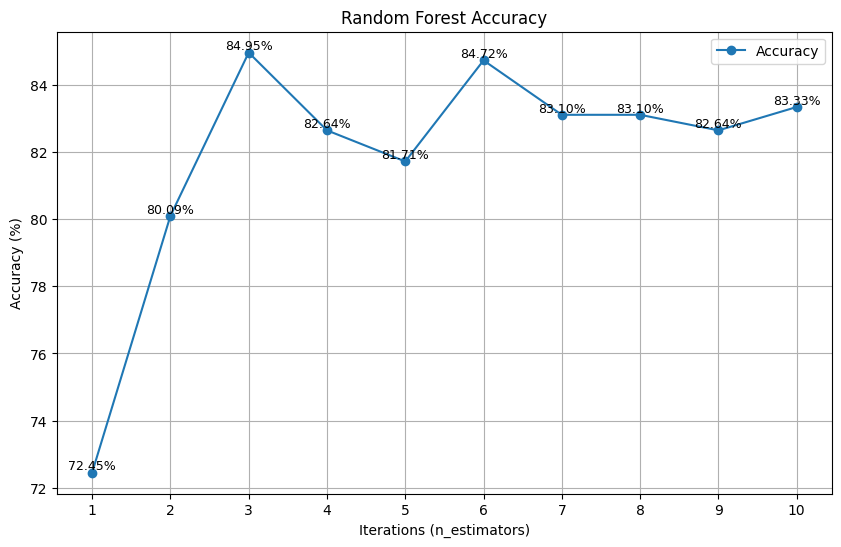

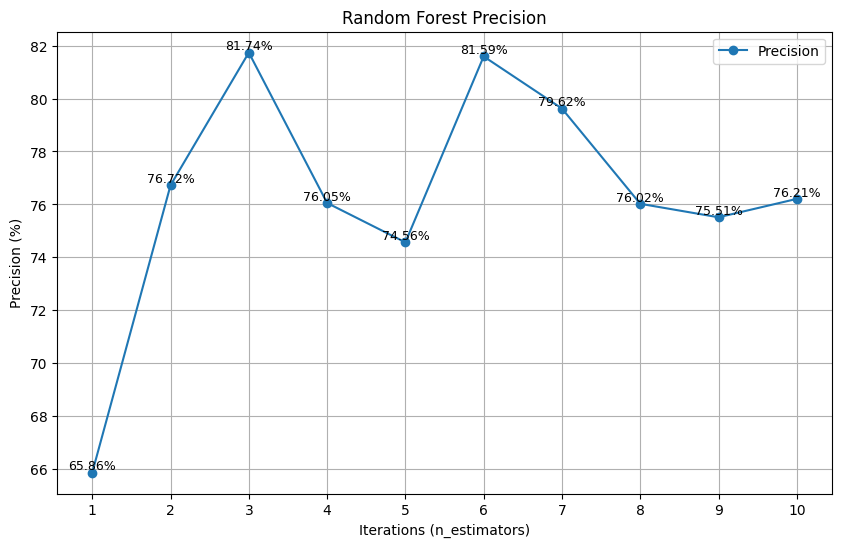

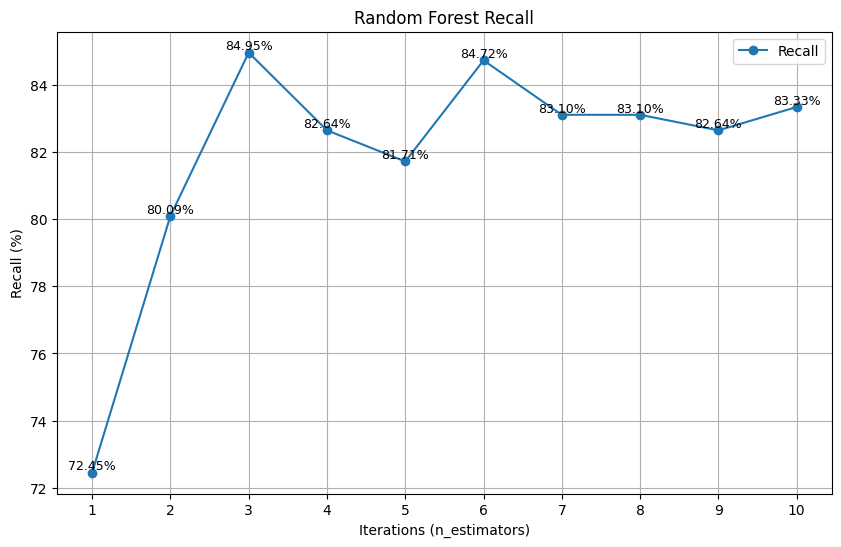

In [38]:
# Plot hasil evaluasi
for metric, values in metrics.items():
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, values, marker='o', label=metric.capitalize())
    for i, value in enumerate(values):
        plt.text(iterations[i], value, f"{value:.2f}%", ha='center', va='bottom', fontsize=9)
    plt.title(f"Random Forest {metric.capitalize()}")
    plt.xlabel("Iterations (n_estimators)")
    plt.ylabel(f"{metric.capitalize()} (%)")
    plt.xticks(iterations)
    plt.legend()
    plt.grid()
    plt.show()

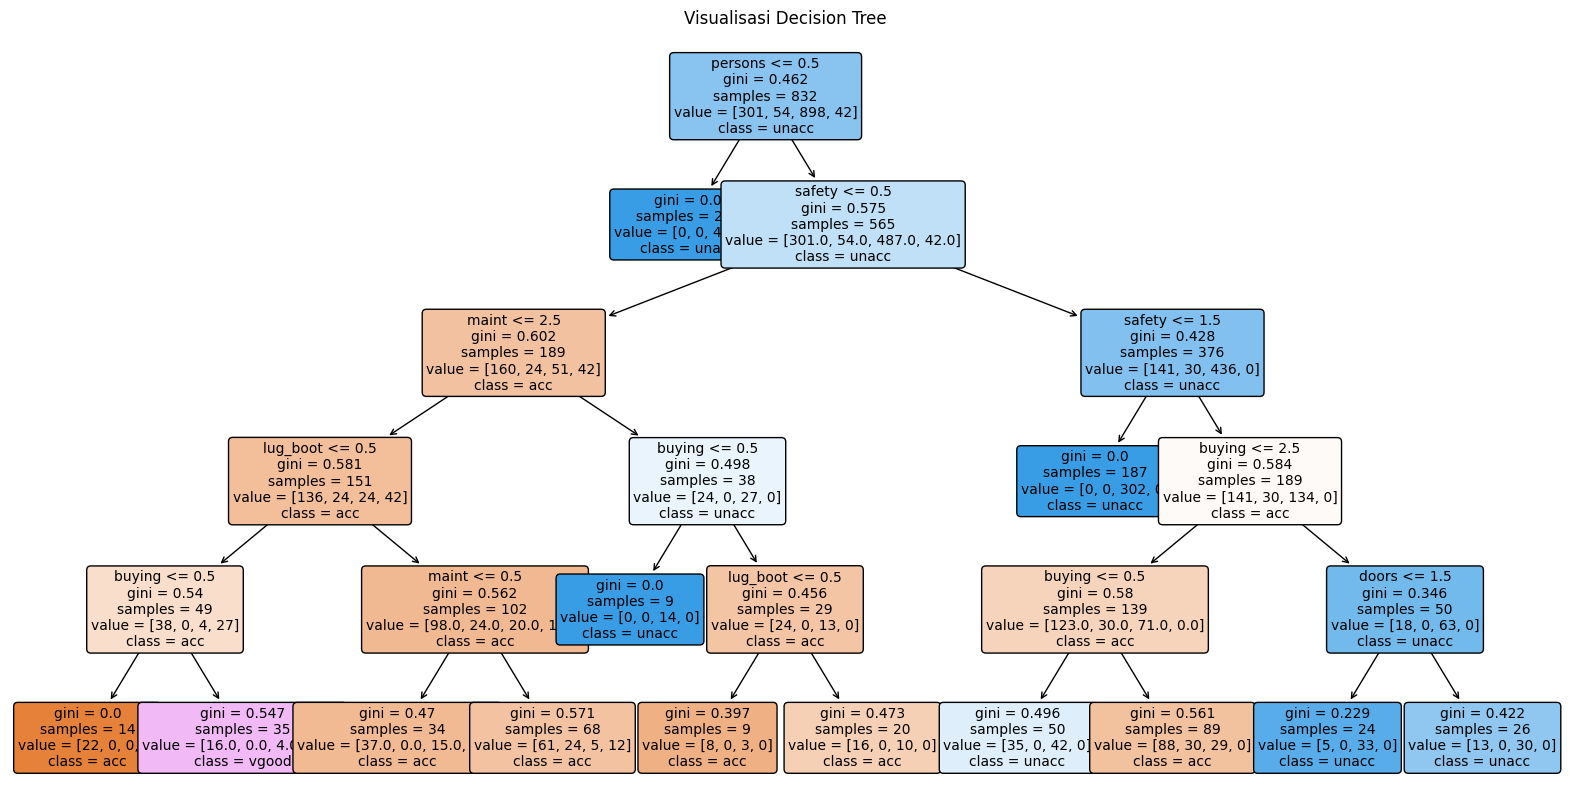

In [39]:
# Visualisasi salah satu decision tree dari Random Forest
tree = rf_model.estimators_[5]  # Memilih decision tree ke-5

# Menampilkan decision tree dengan matplotlib
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=label_encoders["class"].classes_, filled=True, rounded=True, fontsize=10)
plt.title("Visualisasi Decision Tree")
plt.show()

In [40]:
# Eksperimen Baru: Evaluasi dengan parameter berbeda
results = pd.DataFrame(columns=['split_ratio', 'n_estimators', 'max_depth', 'accuracy', 'precision', 'recall'])

split_ratios = [0.25, 0.4, 0.1]  # Rasio data: 75-25, 60-40, 90-10
n_estimators_values = [5, 10, 20]
max_depth_values = [3, 5, 10]

for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)

    for n_estimators in n_estimators_values:
        for max_depth in max_depth_values:
            model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion='entropy', random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            results = pd.concat([results, pd.DataFrame([{
                'split_ratio': split_ratio, 
                'n_estimators': n_estimators, 
                'max_depth': max_depth, 
                'accuracy': accuracy_score(y_test, y_pred), 
                'precision': precision_score(y_test, y_pred, average='weighted'), 
                'recall': recall_score(y_test, y_pred, average='weighted')
            }])], ignore_index=True)


c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\victus\AppData\Local\Temp\ipykernel_22716\2195307648.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{
c:\Users\victus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi


Hasil untuk split_ratio = 0.25:
  n_estimators max_depth  accuracy  precision    recall
0            5         3  0.752315   0.677568  0.752315
1            5         5  0.861111   0.796657  0.861111
2            5        10  0.946759   0.944268  0.946759
3           10         3  0.766204   0.693261  0.766204
4           10         5  0.819444   0.746030  0.819444
5           10        10  0.939815   0.939728  0.939815
6           20         3  0.759259   0.669723  0.759259
7           20         5  0.817130   0.739498  0.817130
8           20        10  0.949074   0.948497  0.949074


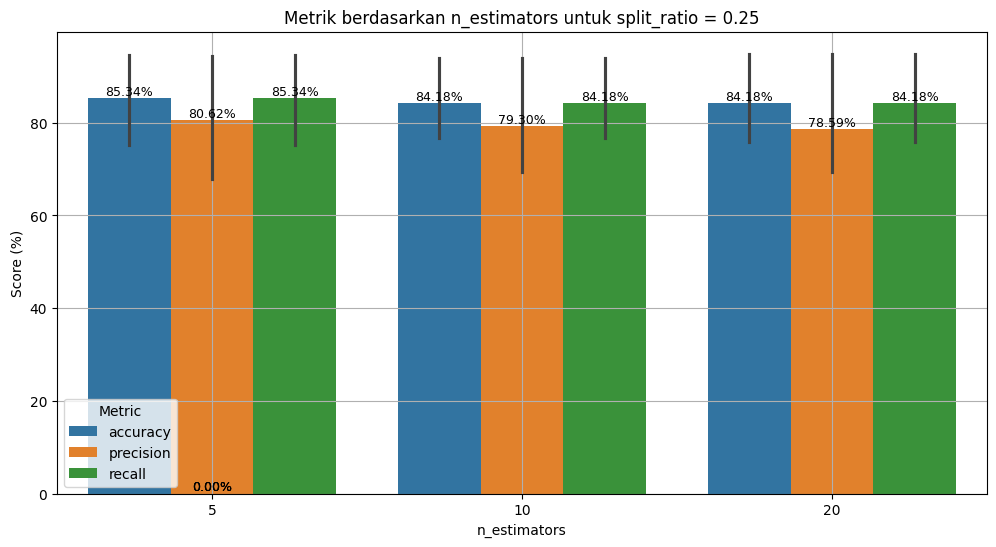


Hasil untuk split_ratio = 0.4:
   n_estimators max_depth  accuracy  precision    recall
9             5         3  0.774240   0.695877  0.774240
10            5         5  0.845152   0.815431  0.845152
11            5        10  0.940666   0.941063  0.940666
12           10         3  0.781476   0.712544  0.781476
13           10         5  0.817656   0.790916  0.817656
14           10        10  0.930535   0.929373  0.930535
15           20         3  0.764110   0.676737  0.764110
16           20         5  0.827786   0.758650  0.827786
17           20        10  0.937771   0.937488  0.937771


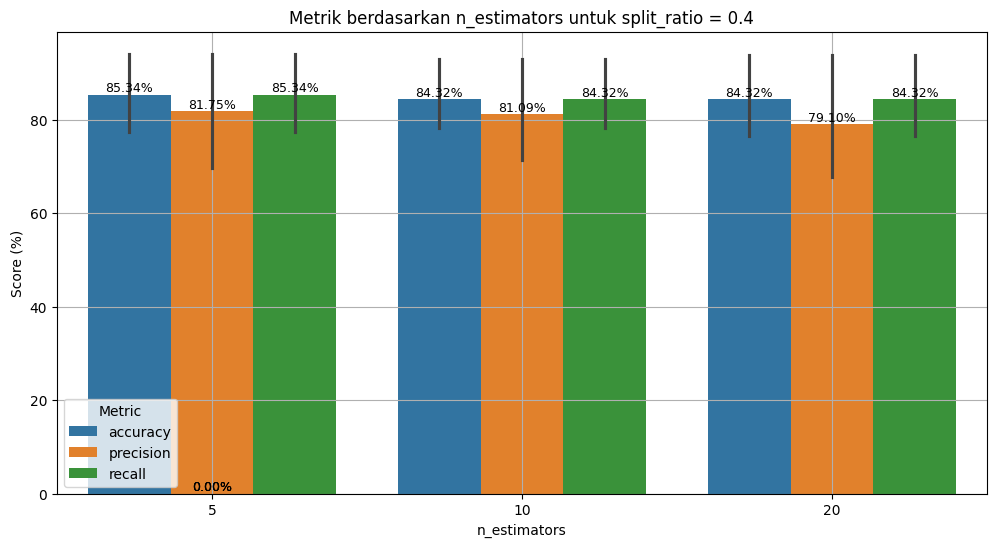


Hasil untuk split_ratio = 0.1:
   n_estimators max_depth  accuracy  precision    recall
18            5         3  0.745665   0.652083  0.745665
19            5         5  0.855491   0.781349  0.855491
20            5        10  0.913295   0.927506  0.913295
21           10         3  0.757225   0.668109  0.757225
22           10         5  0.820809   0.747020  0.820809
23           10        10  0.919075   0.926048  0.919075
24           20         3  0.728324   0.608194  0.728324
25           20         5  0.786127   0.697270  0.786127
26           20        10  0.942197   0.957593  0.942197


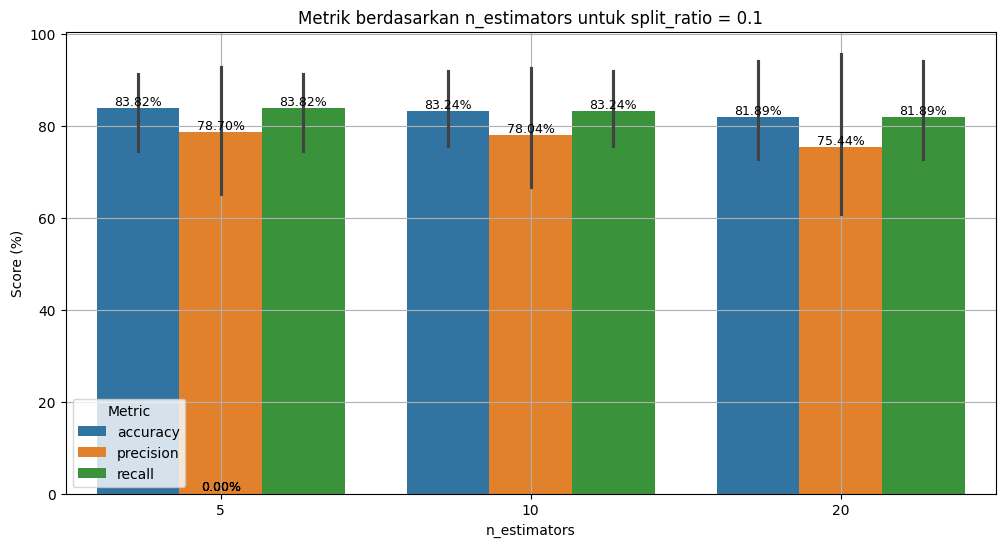

In [41]:
# Memisahkan hasil berdasarkan rasio data
for split_ratio in split_ratios:
    split_results = results[results['split_ratio'] == split_ratio]
    print(f"\nHasil untuk split_ratio = {split_ratio}:")
    print(split_results[['n_estimators', 'max_depth', 'accuracy', 'precision', 'recall']])

    # Visualisasi hasil untuk setiap rasio data
    plt.figure(figsize=(12, 6))
    melted_split_results = pd.melt(split_results, id_vars=['n_estimators', 'max_depth'], 
                                   value_vars=['accuracy', 'precision', 'recall'], 
                                   var_name='Metric', value_name='Score')
    melted_split_results['Score'] *= 100  # Konversi ke persen

    ax = sns.barplot(data=melted_split_results, x='n_estimators', y='Score', hue='Metric')
    plt.title(f'Metrik berdasarkan n_estimators untuk split_ratio = {split_ratio}')
    plt.xlabel('n_estimators')
    plt.ylabel('Score (%)')
    plt.legend(title='Metric')
    plt.grid(True)

    # Menambahkan keterangan angka pada bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%',(p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')

    plt.show()

In [42]:
# Menampilkan hasil terbaik
pivot_results = results.pivot_table(index=['split_ratio', 'n_estimators', 'max_depth'], values=['accuracy', 'precision', 'recall'], aggfunc='mean')

print("Hasil terbaik:")
print(pivot_results.loc[pivot_results['accuracy'].idxmax()])


Hasil terbaik:
accuracy     0.949074
precision    0.948497
recall       0.949074
Name: (0.25, 20, 10), dtype: float64


C:\Users\victus\AppData\Local\Temp\ipykernel_22716\127246230.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_metrics_df, x='Metric', y='Score', palette='tab10')


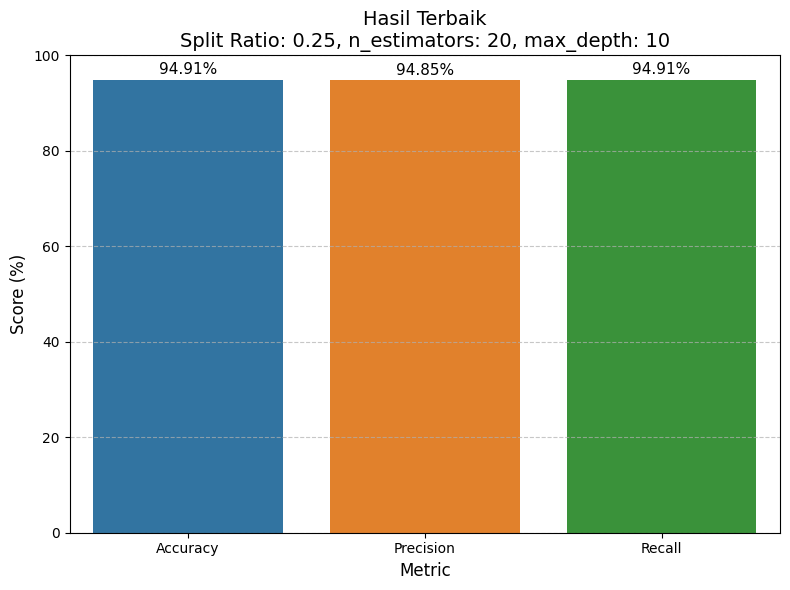

In [ ]:
# Data untuk visualisasi
best_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [0.949074, 0.948497, 0.949074]  # Skor dari hasil terbaik
}

# Konversi ke DataFrame
best_metrics_df = pd.DataFrame(best_metrics)
best_metrics_df['Score'] *= 100  # Konversi ke persen

# Membuat grafik bar
plt.figure(figsize=(8, 6))
sns.barplot(data=best_metrics_df, x='Metric', y='Score', palette='tab10')

# Menambahkan keterangan
plt.title('Hasil Terbaik\nSplit Ratio: 0.25, n_estimators: 20, max_depth: 10', fontsize=14)
plt.ylabel('Score (%)', fontsize=12)
plt.xlabel('Metric', fontsize=12)

# Menambahkan angka di atas bar
for i, score in enumerate(best_metrics_df['Score']):
    plt.text(i, score + 0.5, f'{score:.2f}%', ha='center', va='bottom', fontsize=11, color='black')

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()